# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import data and set path

In [2]:
df = pd.read_pickle(r'C:\Users\christina.savva\Documents\CF Achievement 4 - Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers_departments_final.pkl')

In [3]:
path = r'C:\Users\christina.savva\Documents\CF Achievement 4 - Instacart Basket Analysis'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 37 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   order_id                 object 
 1   user_id                  object 
 2   eval_set                 object 
 3   order_number             int8   
 4   orders_day_of_week       int8   
 5   order_hour_of_day        int8   
 6   days_since_prior_order   float64
 7   first_order              object 
 8   product_id               int16  
 9   reordered                int8   
 10  product_name             object 
 11  aisle_id                 int8   
 12  department_id            int8   
 13  prices                   float64
 14  price_range_loc          object 
 15  busiest_day              object 
 16  busiest_days             object 
 17  busiest_period_of_day    object 
 18  max_order                int8   
 19  loyalty_flag             object 
 20  spend_group              float64
 21  spend_

# 4.10 Part 2.1 Visualizationsto answer business questions from the project brief

In [ ]:
#  The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads 

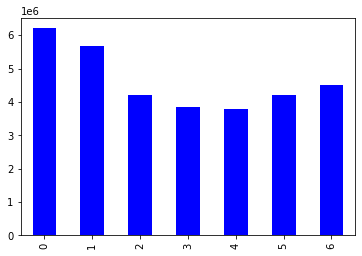

In [13]:
bar_orders_day_of_week = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['b'])

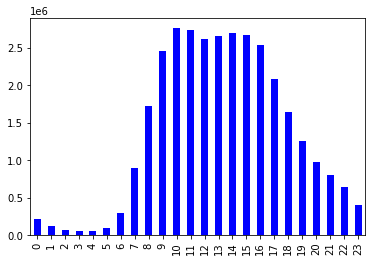

In [11]:
bar_order_hour_of_day = df['order_hour_of_day'].value_counts().sort_index().plot.bar(color =['b'])

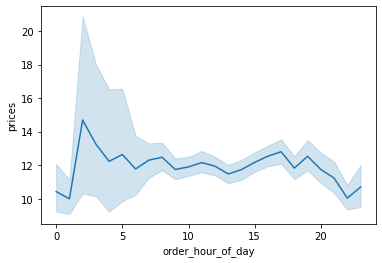

In [15]:
#  They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they 

line_order_hour_of_day_prices = sns.lineplot(data = df, x = 'order_hour_of_day',y = 'prices')

In [16]:
#  Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.
#  Checking price ranges (from $1 to $99999)

df['prices'].value_counts().sort_index()

1.0        115143
1.1        242782
1.2        256258
1.3        425691
1.4        392209
            ...  
24.8          410
24.9         5781
25.0        13772
14900.0      4429
99999.0       698
Name: prices, Length: 242, dtype: int64

In [ ]:
#  defining price ranges (arbitrary amounts)

#  $0-$1
#  $1-$3
#  $3-$5
#  $5-$10
#  $10-$20
#  $20-$50
#  $50-$100
#  $100-$1000
#  $1000

In [27]:
#  creating price groups

prices = []

for value in df['prices']:
    if value <= 1: 
        prices.append('$0-$1')
    elif (value > 1) and (value <= 3):
        prices.append('$0001-$0003')
    elif (value > 3) and (value <= 5):
        prices.append('$0003-$00005')
    elif (value > 5) and (value <= 10):
        prices.append('$0005-$0010')
    elif (value > 10) and (value <= 20):
        prices.append('$0010-$0020')
    elif (value > 20) and (value <= 50):
        prices.append('$0020-$0050')
    elif (value > 50) and (value <= 100):
        prices.append('$0050-$0100')
    elif (value > 100) and (value <= 1000):
        prices.append('$0100-$1000')
    elif (value > 1000):
        prices.append('$1000+')
    else: 
        prices.append('other')

In [28]:
#  creating the new price_group column

df['price_group'] = prices

In [29]:
df['price_group'].value_counts().sort_index()

$0-$1             115143
$0001-$0003      4822219
$0003-$00005     5188959
$0005-$0010     11762458
$0010-$0020     10283732
$0020-$0050       227221
$1000+              5127
Name: price_group, dtype: int64

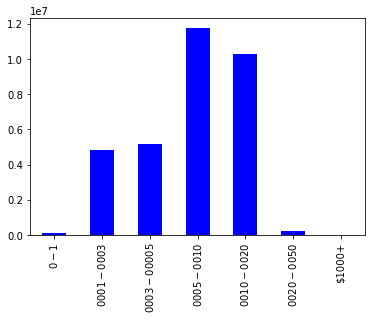

In [30]:
bar_price_group = df['price_group'].value_counts().sort_index().plot.bar(color =['b'])

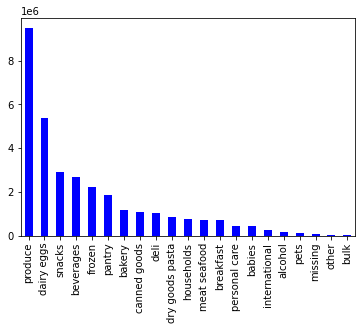

In [32]:
#  Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

bar_departments = df['department_name'].value_counts().plot.bar(color =['b'])

In [34]:
df['department_name'].value_counts()

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
households          738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department_name, dtype: int64

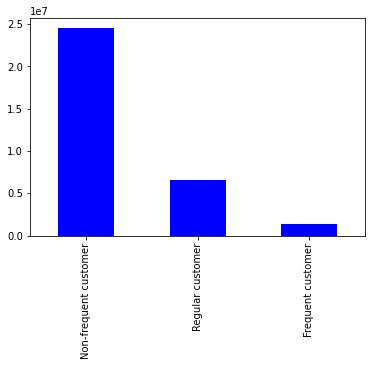

In [41]:
#  What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

bar_frequency_flag = df['frequency_flag'].value_counts().plot.bar(color =['b'])

In [39]:
df['frequency_flag'].value_counts()

Non-frequent customer    24487186
Regular customer          6533511
Frequent customer         1384157
Name: frequency_flag, dtype: int64

In [46]:
24487186+6533511+1384157

32404854

In [47]:
24487186/32404854  #  percentage of non-frequent customer

0.7556641359964158

In [48]:
6533511/32404854  #  percentage of regular customer

0.20162136820613355

In [49]:
1384157/32404854  #  percentage of frequent customer

0.04271449579745059

In [44]:
crosstab_order_frequency_frequency_flag = pd.crosstab(df['order_frequency'], df['frequency_flag'], dropna = False)  #  reviewing set up of prder frequency flag

In [45]:
crosstab_order_frequency_frequency_flag

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
order_frequency,,,
0.0,355,0,0
1.0,1326,0,0
2.0,5436,0,0
3.0,11117,0,0
4.0,43791,0,0
5.0,76445,0,0
6.0,81780,0,0
7.0,195020,0,0
8.0,286834,0,0


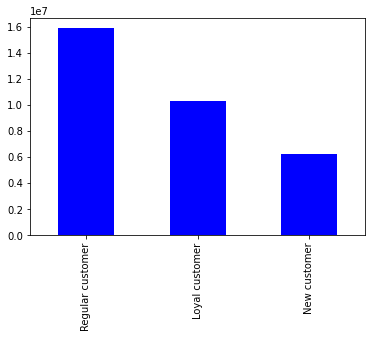

In [51]:
#  Are there differences in ordering habits based on a customer’s loyalty status?

bar_loyalty_flag = df['loyalty_flag'].value_counts().plot.bar(color =['b'])

In [52]:
df['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

In [53]:
15876776+10284093+6243990

32404859

In [58]:
15876776/32404859  #  percentage of regular customer

0.4899504731682369

In [57]:
10284093/32404859  #  percentage of loyal customer

0.31736268317044675

In [56]:
6243990/32404859  #  percentage of new customer

0.19268684366131636

In [59]:
crosstab_max_order_loyalty_flag = pd.crosstab(df['max_order'], df['loyalty_flag'], dropna = False)  #  reviewing set up of prder loyalty flag

In [60]:
crosstab_max_order_loyalty_flag

loyalty_flag,Loyal customer,New customer,Regular customer
max_order,,,
1,0,5,0
2,0,6,0
3,0,686741,0
4,0,753543,0
5,0,793140,0
...,...,...,...
95,59877,0,0
96,40453,0,0
97,44949,0,0


In [ ]:
#  Are there differences in ordering habits based on a customer’s region?

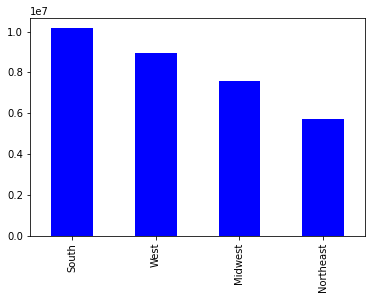

In [62]:
bar_region = df['region'].value_counts().plot.bar(color =['b'])

In [63]:
df['region'].value_counts()

South        10154861
West          8929937
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [82]:
crosstab_region_department = pd.crosstab(df['region'], df['department_name'], dropna = False)

In [83]:
crosstab_region_department

department_name,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,households,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,36186,98983,273869,625574,163551,8193,250702,1264223,245678,203769,...,175824,63736,166129,16535,8420,442101,105749,22355,2227937,673715
Northeast,26542,75139,208599,483418,123574,5802,186755,954026,186817,151816,...,131485,46891,124620,12374,6585,329445,78815,18601,1665839,514675
South,48517,134548,365344,844562,220484,10766,334434,1691315,329717,270804,...,228076,84182,222295,21846,11570,585432,140520,29217,2975048,900997
West,42451,115132,324616,734569,195424,9812,296167,1489183,289037,240238,...,203281,74444,195883,18390,9716,518391,122488,27543,2610467,798163


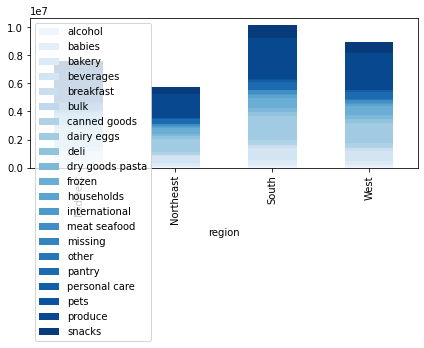

In [87]:
bar_crosstab_region_department = crosstab_region_department.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 21))
plt.legend(loc='upper left')
plt.tight_layout()

In [88]:
crosstab_region_orders_day_of_week = pd.crosstab(df['region'], df['orders_day_of_week'], dropna = False)

In [89]:
crosstab_region_orders_day_of_week

orders_day_of_week,0,1,2,3,4,5,6
region,,,,,,,
Midwest,1460186,1320759,991770,895093,888131,983262,1058124
Northeast,1097258,999953,746153,679308,666326,746455,787283
South,1934432,1779016,1319537,1211048,1182377,1318265,1410186
West,1712306,1560502,1156370,1055085,1046968,1157809,1240897


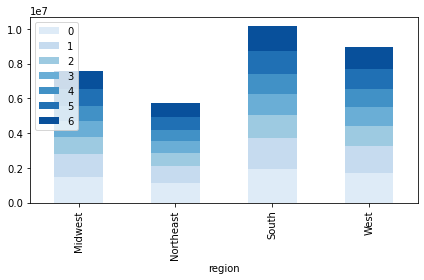

In [91]:
bar_crosstab_region_orders_day_of_week = crosstab_region_orders_day_of_week.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 7))
plt.legend(loc='upper left')
plt.tight_layout()

In [93]:
crosstab_orders_day_of_week_region = pd.crosstab(df['orders_day_of_week'], df['region'], dropna = False)

In [94]:
crosstab_orders_day_of_week_region

region,Midwest,Northeast,South,West
orders_day_of_week,,,,
0,1460186,1097258,1934432,1712306
1,1320759,999953,1779016,1560502
2,991770,746153,1319537,1156370
3,895093,679308,1211048,1055085
4,888131,666326,1182377,1046968
5,983262,746455,1318265,1157809
6,1058124,787283,1410186,1240897


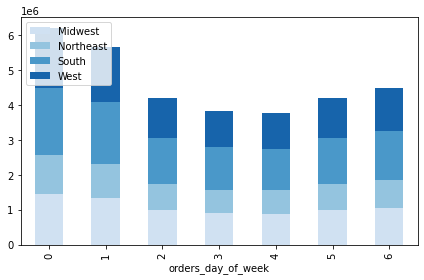

In [96]:
bar_crosstab_orders_day_of_week_region = crosstab_orders_day_of_week_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 4))
plt.legend(loc='upper left')
plt.tight_layout()

In [98]:
#  Is there a connection between age and family status in terms of ordering habits?

crosstab_parents_age = pd.crosstab(df['parental_status'], df['age_group'], dropna = False)

In [100]:
crosstab_parents_age

age_group,18-34,35-50,51-66,67-81
parental_status,,,,
non parent,2156927,2002891,2052306,1885379
parent,6470728,6131679,5978446,5726503


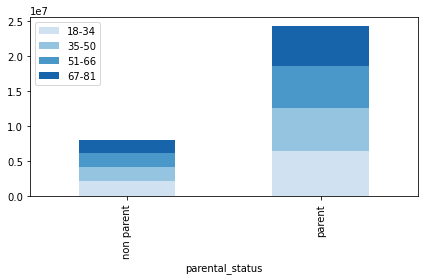

In [101]:
bar_crosstab_parents_age = crosstab_parents_age.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 4))
plt.legend(loc='upper left')
plt.tight_layout()

In [103]:
crosstab_age_parents = pd.crosstab(df['age_group'], df['parental_status'], dropna = False)

In [104]:
crosstab_age_parents

parental_status,non parent,parent
age_group,,
18-34,2156927,6470728
35-50,2002891,6131679
51-66,2052306,5978446
67-81,1885379,5726503


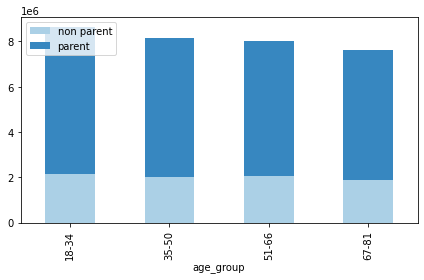

In [105]:
bar_crosstab_age_parents = crosstab_age_parents.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 2))
plt.legend(loc='upper left')
plt.tight_layout()

In [106]:
crosstab_order_hour_of_day_parents = pd.crosstab(df['order_hour_of_day'], df['parental_status'], dropna = False)

In [107]:
crosstab_order_hour_of_day_parents

parental_status,non parent,parent
order_hour_of_day,,
0,54172,164597
1,28342,87358
2,17569,51806
3,13015,38266
4,12739,40503
5,22052,65909
6,73491,217002
7,226971,664083
8,431499,1286619


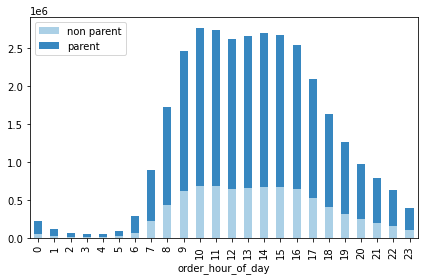

In [108]:
bar_crosstab_order_hour_of_day_parents = crosstab_order_hour_of_day_parents.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 2))
plt.legend(loc='upper left')
plt.tight_layout()

In [ ]:
#  What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

In [110]:
crosstab_income_group_loyalty_flag = pd.crosstab(df['income_group'], df['loyalty_flag'], dropna = False)

In [111]:
crosstab_income_group_loyalty_flag

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
025-40k,489034,419727,818437
040-55k,892433,666674,1453680
055-75k,1856830,1082325,2763680
075-100k,2287587,1324539,3535711
100-150k,3447268,2019147,5296947
150k-250k,1240346,712639,1915275
250k-500k,64641,17695,80889
500k+,5954,1244,12157


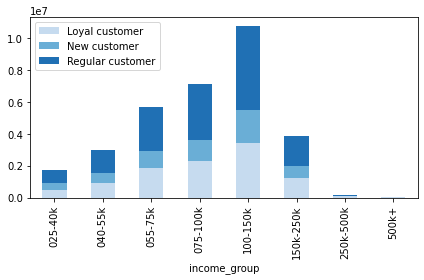

In [112]:
bar_crosstab_income_group_loyalty_flag = crosstab_income_group_loyalty_flag.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 3))
plt.legend(loc='upper left')
plt.tight_layout()

In [113]:
crosstab_price_group_income_group = pd.crosstab(df['price_group'], df['income_group'], dropna = False)

In [114]:
crosstab_price_group_income_group

income_group,025-40k,040-55k,055-75k,075-100k,100-150k,150k-250k,250k-500k,500k+
price_group,,,,,,,,
$0-$1,6738,11542,20077,24737,37873,13253,813,110
$0001-$0003,388061,562366,820775,987958,1494023,540952,24978,3106
$0003-$00005,353294,551503,893589,1105048,1662309,595540,24888,2788
$0005-$0010,608746,1077410,2075735,2610223,3918562,1407397,57512,6873
$0010-$0020,367108,796605,1851194,2364540,3566664,1279424,51991,6206
$0020-$0050,3251,13361,41459,55054,82953,29714,1325,104
$1000+,0,0,6,277,978,1980,1718,168


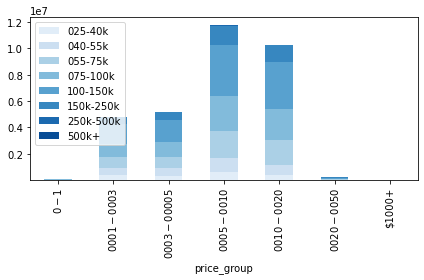

In [115]:
bar_crosstab_price_group_income_group = crosstab_price_group_income_group.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 8))
plt.legend(loc='upper left')
plt.tight_layout()

In [117]:
crosstab_department_family_status = pd.crosstab(df['department_name'], df['family_status'], dropna = False)

In [118]:
crosstab_department_family_status

family_status,divorced/widowed,living with parents and siblings,married,single
department_name,,,,
alcohol,12615,8896,105682,26503
babies,35326,20146,297162,71168
bakery,100401,56142,821881,194004
beverages,231025,124629,1889052,443417
breakfast,59498,34731,493725,115079
bulk,2765,1674,24621,5513
canned goods,89259,51190,752030,175579
dairy eggs,461911,260787,3788598,887451
deli,90818,50415,735689,174327


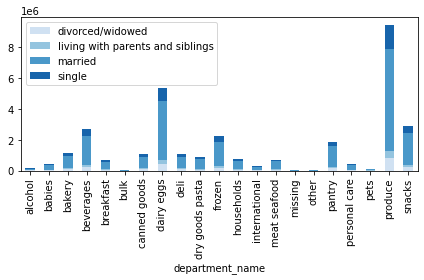

In [120]:
bar_crosstab_department_family_status = crosstab_department_family_status.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 4))
plt.legend(loc='upper left')
plt.tight_layout()